## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 200, 5, 4, 1, 1.0, 1.0, 30.0, 0.85, 0.25, 1.0)


110.90529655432266


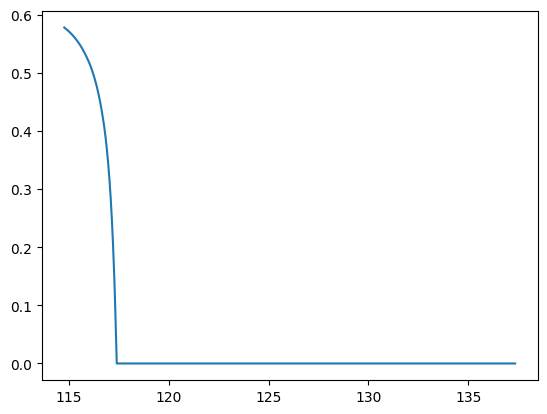

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

Jshape (3, 5, 5, 200, 1)
W shape (3, 5, 5, 200, 1, 2)
Diff Rho: 0.7357637282355428
Errors: 3.5848074809334696 0.021419424065067107 1
EJinv 91.84689049296581
EJderiv 115.87869104468926
EJinv diff 1j 2s: 2.122757065366142
EJinv diff 1 sen: 200.0564011750292
EJinv diff 2 sen: 238.0725681642124


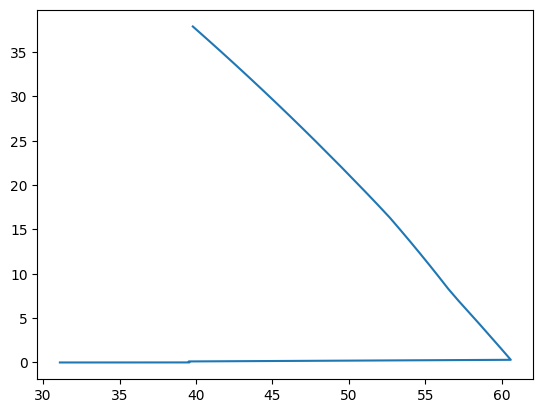

Diff Rho: 1.7992232643878925
Diff Rho: 0.9718047524805864
Diff Rho: 0.7920459099483282
Diff Rho: 0.9887196981141733
Diff Rho: 1.9429672405357523
Diff Rho: 5.7710938588026695
Diff Rho: 0.9834991069772343
Diff Rho: 1.6957860697292697
Diff Rho: 1.8006406022158135
n0_star borders 0.0 4.0
Diff Rho: 2.197132587187365
Errors: 0.01244610587017139 0.0012693511203122607 1
n0_star borders 0.0 3.2805020712777417
Diff Rho: 5.192175120866791
n0_star borders 0.0 3.1602946743616935
Diff Rho: 2.58708059649472
n0_star borders 0.0 2.9645013844874955
Diff Rho: 2.3225700830621814
n0_star borders 0.0 2.9125818130545786
Diff Rho: 2.400941914795728
n0_star borders 0.0 2.8766936028504597
Diff Rho: 1.9882982380622163
n0_star borders 0.0 2.8489133946840615
Diff Rho: 2.075595989481118
n0_star borders 0.0 2.655833577165918
Diff Rho: 2.031086530497689
n0_star borders 0.0 2.8540817068318187
Diff Rho: 2.3677160708532576
n0_star borders 0.0 2.821141371962703
Diff Rho: 3.6366167238800218
n0_star borders 0.0 2.817147878

In [4]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
stats.print_stats()


Jshape (3, 5, 5, 200, 1)
W shape (3, 5, 5, 200, 1, 2)
Diff Rho: 0.7357637282355428
Errors: 3.5848074809334696 0.028300363948499056 1
EJinv 91.84689049296581
EJderiv 115.87869104468926
EJinv diff 1j 2s: 2.122757065366142
EJinv diff 1 sen: 200.0564011750292
EJinv diff 2 sen: 238.0725681642124


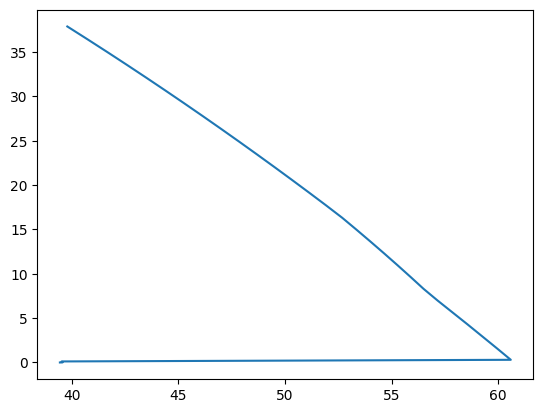

Diff Rho: 1.0227418576646965
Diff Rho: 0.8395713403010534
Diff Rho: 1.137162653500298
Diff Rho: 22.142656528185654
Diff Rho: 0.9893082403422601
Diff Rho: 0.8106407511324835
Diff Rho: 0.7433803327384585
Diff Rho: 0.7205879998255338
Diff Rho: 0.7263288121863679
n0_star borders 0.0 4.0
Diff Rho: 0.8382341943532166
Errors: 0.013252131256966615 0.0010890250117462081 1
n0_star borders 0.0 2.6689657002723592
Diff Rho: 0.9947673408878985
n0_star borders 0.0 2.3113626132881366
Diff Rho: 1.5046460076447747
n0_star borders 0.0 3.378848984724839
Diff Rho: 1.461111253882633
n0_star borders 0.0 4.0
Diff Rho: 1.9030404022905067
n0_star borders 0.0 4.0
Diff Rho: 2.393946809366055
n0_star borders 0.0 1.9089003696291835
Diff Rho: 1.9242615277234218
n0_star borders 0.0 1.9447736074548945
Diff Rho: 3.4659559124042536
n0_star borders 0.0 1.9469094675623202
Diff Rho: 2.3720107890012
n0_star borders 0.0 1.9365621537281668
Diff Rho: 2.0641277175227617
n0_star borders 0.0 1.9350348090824983
Diff Rho: 2.0243681

In [4]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
stats.print_stats()


Profiling a new "improvement" of calculating rho_star: restricting to iv which are above the previous rho_star
The usual version takes 18m33s total, with optimized loop taking 6.857s, and find_indices (which includes more than just this) taking 15.262s. So, if there's any improvement, it's likely to be small. But let's see
Okay, with the "improvement", it's now 19m39? With optimized loop taking 7.95s, and find_indices taking 16.8... how???
Trying the original again... bitch it's 19m23.2 . Optimized loop is 7.415s, and find_indices is 16.831. So they're really are almost exactly the same lol.    

Jshape (5, 5, 5, 200, 1)
W shape (5, 5, 5, 200, 1, 2)
Diff Rho: 0.8599989844084844
Errors: 8.68782382066308 0.029854379975805517 1
EJinv 57.722938470786524
EJderiv 121.66849277697762
EJinv diff 1j 2s: 57.5291073877671
EJinv diff 1 sen: 5.135786710238283
EJinv diff 2 sen: 9.402682831213998


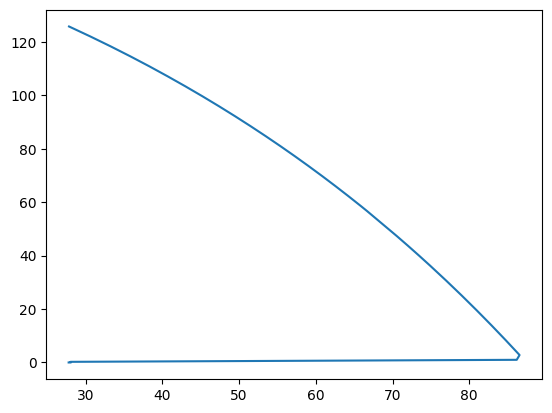

Diff Rho: 0.7137612065592572
Diff Rho: 0.8223213238121813
Diff Rho: 1.509909395869284
Diff Rho: 0.7674970429029959
Diff Rho: 0.7358854874781623
Diff Rho: 0.8385247091913793
Diff Rho: 2.376349667175086
Diff Rho: 3.0964599068867513
Diff Rho: 1.3433486805213448
n0_star borders 0.0 4.0
Diff Rho: 1.1867008536688897
Errors: 0.07669881583006616 0.0020367628049255595 1
n0_star borders 0.0 4.0
Diff Rho: 3.0371113116200648
n0_star borders 0.0 3.600298800622589
Diff Rho: 1.6193303930756944
n0_star borders 0.0 3.555644306827183
Diff Rho: 1.678193621610711
n0_star borders 0.0 3.558816801713083
Diff Rho: 2.1498830230604127
n0_star borders 0.0 3.5984430208977605
Diff Rho: 4.3472515987087945
n0_star borders 0.0 3.6239390408858885
Diff Rho: 4.983549486270986
n0_star borders 0.0 3.5734750630937615
Diff Rho: 4.9455569558334895
n0_star borders 0.0 3.4875321713157206
Diff Rho: 7.991190984800466
n0_star borders 0.0 3.3818591415543535
Diff Rho: 7.4544668547006685
n0_star borders 0.0 3.2497545965028327
Diff R

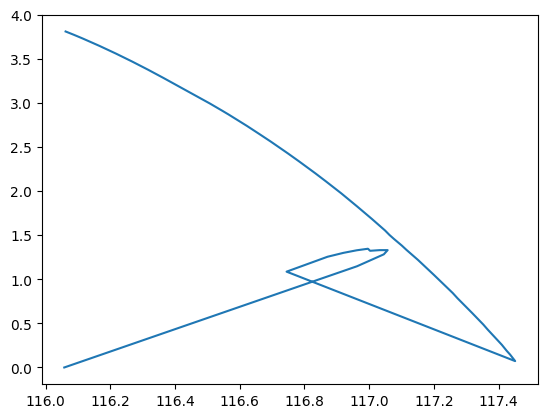

n0_star borders 0.0 1.9755046134976617
Diff Rho: 0.09201678547350778
n0_star borders 0.0 1.9830129735277184
Diff Rho: 0.0867574353141239
n0_star borders 0.0 3.5719610184725075
Diff Rho: 0.08215332122418395
n0_star borders 0.0 2.9009324184300223
Diff Rho: 0.07806677546264368
n0_star borders 0.0 1.975894117212051
Diff Rho: 0.07455551887528106
n0_star borders 0.0 2.8401507022979247
Diff Rho: 0.07145544701283432
n0_star borders 0.0 4.0
Diff Rho: 0.06878987989293985
n0_star borders 0.0 3.728389684992341
Diff Rho: 0.06652217630200605
n0_star borders 0.0 3.7445429882174004
Diff Rho: 0.06463839302689896
n0_star borders 0.0 1.9761222815121169
Diff Rho: 0.06322695466281547
Errors: 2.0779164759507157e-05 2.655149085080529e-07 1
n0_star borders 0.0 1.9764691200214162
Diff Rho: 0.06231893978231724
n0_star borders 0.0 1.9767230542494232
Diff Rho: 0.060998997558342406
n0_star borders 0.0 1.9793234223694847
Diff Rho: 0.05994965699413597
n0_star borders 0.0 1.9772740505742266
Diff Rho: 0.05896669429179

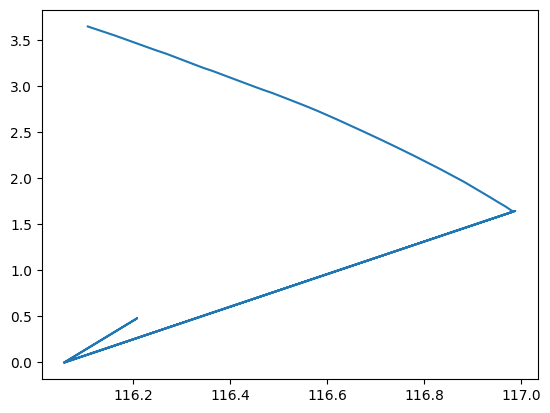

n0_star borders 0.0 3.7925759495118916
Diff Rho: 0.05710203287899654
n0_star borders 0.0 3.770065437626169
Diff Rho: 0.05720826530683198
n0_star borders 0.0 3.7421688557764434
Diff Rho: 0.05695490325365769
n0_star borders 0.0 3.5746375572225135
Diff Rho: 0.05658170236868851
n0_star borders 0.0 3.3987434204493248
Diff Rho: 0.05583701140901327
n0_star borders 0.0 3.565626677975563
Diff Rho: 0.05932093707554719
n0_star borders 0.0 3.4221749194820084
Diff Rho: 0.05989608726423681
n0_star borders 0.0 3.5468421945875317
Diff Rho: 0.05926065090022726
n0_star borders 0.0 3.7060462801864205
Diff Rho: 0.057839722989947905
n0_star borders 0.0 3.693679988702408
Diff Rho: 0.057715646744227425
Errors: 1.7919637297027842e-05 1.1284303241807557e-08 1
n0_star borders 0.0 3.651677510195981
Diff Rho: 0.05551167802707497
n0_star borders 0.0 3.5416802308568496
Diff Rho: 0.05529261904708968
n0_star borders 0.0 3.5453743728781673
Diff Rho: 0.055034257968575126
n0_star borders 0.0 3.566165688698027
Diff Rho: 

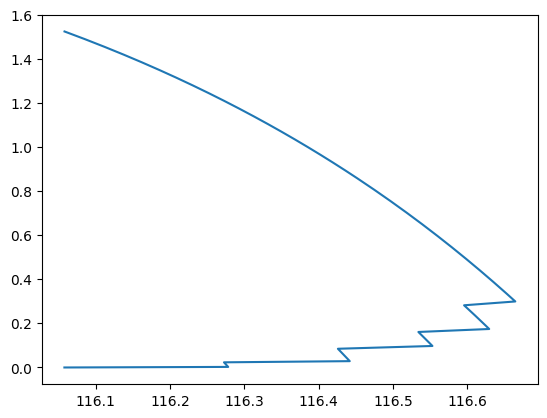

n0_star borders 0.0 2.8537815820056585
Diff Rho: 0.4056830018758604
n0_star borders 0.0 2.7225880433152887
Diff Rho: 0.3472166784172781
n0_star borders 0.0 2.74126711176162
Diff Rho: 0.29085147229106406
n0_star borders 0.0 2.7574125949378314
Diff Rho: 0.25844907706627307
n0_star borders 0.0 2.8583505794614004
Diff Rho: 0.24184670021572388
n0_star borders 0.0 2.818542735271685
Diff Rho: 0.22988561539979246
n0_star borders 0.0 2.803115494995594
Diff Rho: 0.22265087163702268
n0_star borders 0.0 2.8167731914436533
Diff Rho: 0.2154075037208291
n0_star borders 0.0 2.8975204343245076
Diff Rho: 0.21085630476134626
n0_star borders 0.0 2.912564852363658
Diff Rho: 0.20832392192908067
Errors: 0.0006689214366784265 3.0217343399638494e-07 1
n0_star borders 0.0 2.8644783527281983
Diff Rho: 0.2150685935340469
n0_star borders 0.0 2.922587100566605
Diff Rho: 0.2272816598334452
n0_star borders 0.0 2.9333566208062027
Diff Rho: 0.23318327700384633
n0_star borders 0.0 2.9864841927727372
Diff Rho: 0.24786629

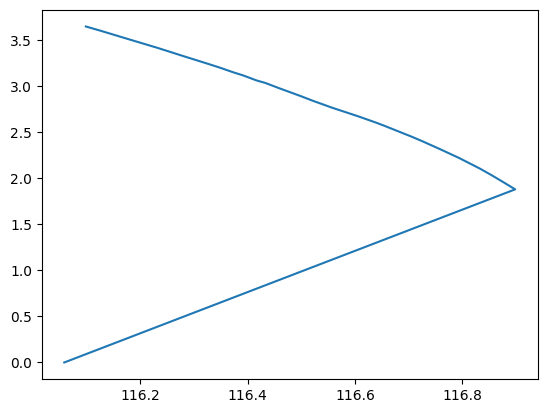

n0_star borders 0.0 3.7363608066155853
Diff Rho: 0.9635971552999798
n0_star borders 0.0 3.7584628326114276
Diff Rho: 0.5382112454451019
n0_star borders 0.0 3.77250307797586
Diff Rho: 0.5073359754082527
n0_star borders 0.0 3.7662467504953483
Diff Rho: 0.5023358393418977
n0_star borders 0.0 3.7487366945209724
Diff Rho: 0.558868777369368
n0_star borders 0.0 3.723319233370409
Diff Rho: 0.49918260913252177
n0_star borders 0.0 3.7567993427386828
Diff Rho: 0.478978310973042
n0_star borders 0.0 3.7340653434064905
Diff Rho: 0.7426651966777428
n0_star borders 0.0 3.7321957847272387
Diff Rho: 0.5676156942829279
n0_star borders 0.0 3.780824119349946
Diff Rho: 1.0346131463744994
Errors: 0.00034558325962645944 2.4998504855057085e-07 1
n0_star borders 0.0 3.6889958946422308
Diff Rho: 0.8743510200025347
n0_star borders 0.0 3.678453663245128
Diff Rho: 0.6366339951681336
n0_star borders 0.0 3.6130557698201287
Diff Rho: 0.6071803504701283
n0_star borders 0.0 3.6456545035735837
Diff Rho: 0.523843882884934

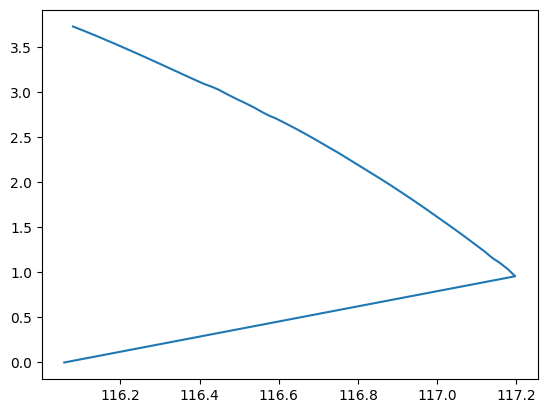

n0_star borders 0.0 3.1697568314186912
Diff Rho: 1.348732808986731
n0_star borders 0.0 3.0355011468809976
Diff Rho: 2.0109967362425403
n0_star borders 0.0 3.1232859628298963
Diff Rho: 142.47442890930466
n0_star borders 0.0 3.102084863504019
Diff Rho: 0.5670221593465367
n0_star borders 0.0 3.077287765825523
Diff Rho: 0.27762943706060994
n0_star borders 0.0 3.045577051506004
Diff Rho: 0.20490932321486557
n0_star borders 0.0 3.014072960235465
Diff Rho: 0.1671312323856891
n0_star borders 0.0 2.9933962577440396
Diff Rho: 0.14340268205475037
n0_star borders 0.0 2.988244377675601
Diff Rho: 0.12657940579933566
n0_star borders 0.0 2.9857675967730435
Diff Rho: 0.11387372834308442
Errors: 5.539158184278458e-05 6.669469879442867e-08 1
n0_star borders 0.0 2.987092245461885
Diff Rho: 0.10429398874247613
n0_star borders 0.0 2.988639431971558
Diff Rho: 0.09698810053448802
n0_star borders 0.0 2.9895169884449917
Diff Rho: 0.09103441765553603
n0_star borders 0.0 2.989754641752991
Diff Rho: 0.086088350473

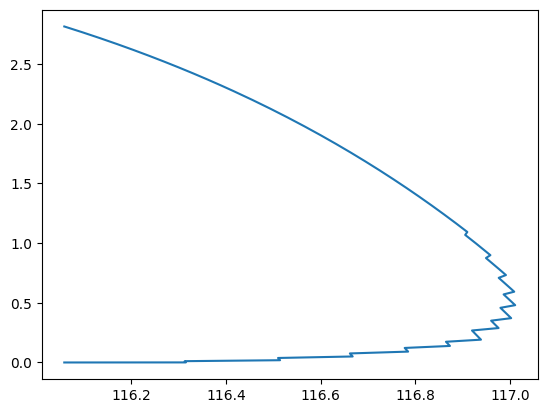

n0_star borders 0.0 1.9917058084725567
Diff Rho: 0.31937147905913654
n0_star borders 0.0 1.9803816056649002
Diff Rho: 0.36683394472240705
n0_star borders 0.0 1.9790136827056761
Diff Rho: 0.3987803560503107
n0_star borders 0.0 1.9790370995584357
Diff Rho: 1.1459712357216094
n0_star borders 0.0 1.9790796469117549
Diff Rho: 0.30778618656055756
n0_star borders 0.0 1.9791488681389544
Diff Rho: 0.32365337939447913
n0_star borders 0.0 1.9792473288717574
Diff Rho: 0.3382081009093999
n0_star borders 0.0 1.979351807586078
Diff Rho: 0.8971361950420454
n0_star borders 0.0 2.899342473679981
Diff Rho: 0.7003324156955292
n0_star borders 0.0 2.9188709201295424
Diff Rho: 0.6965040610755354
Errors: 8.007099776111125e-05 5.8912416612869265e-08 1
n0_star borders 0.0 1.9687372823996963
Diff Rho: 1.542001393328038
n0_star borders 0.0 1.9696530540935044
Diff Rho: 2.2760263494645505
n0_star borders 0.0 1.9705546017190372
Diff Rho: 1.9733278045210503
n0_star borders 0.0 3.7242547446673937
Diff Rho: 1.523467918

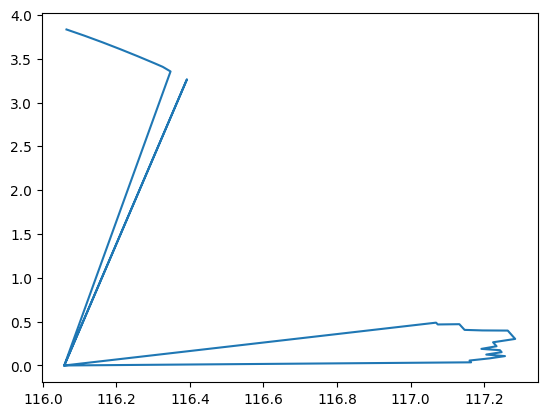

n0_star borders 0.0 2.886419446919782
Diff Rho: 0.0824649410590266
n0_star borders 0.0 2.8782833053659362
Diff Rho: 0.07503513606335693
n0_star borders 0.0 2.881685682491561
Diff Rho: 0.07461316163463325
n0_star borders 0.0 4.0
Diff Rho: 0.0803955610415985
n0_star borders 0.0 4.0
Diff Rho: 0.12336783190356848
n0_star borders 0.0 4.0
Diff Rho: 0.5742610185699976
n0_star borders 0.0 3.9326296311354807
Diff Rho: 2.223818271046642
n0_star borders 0.0 4.0
Diff Rho: 2.1180072160139303
n0_star borders 0.0 2.6834709027622865
Diff Rho: 1.5135428331754304
n0_star borders 0.0 2.333226919989418
Diff Rho: 1.8521304622620232
Errors: 0.0419563724896227 1.0740668014289637e-06 1
n0_star borders 0.0 4.0
Diff Rho: 1.6425359186886872
n0_star borders 0.0 2.1179290349379314
Diff Rho: 1.382058136562044
n0_star borders 0.0 4.0
Diff Rho: 2.2015024807662606
n0_star borders 0.0 4.0
Diff Rho: 2.3754884639564495
n0_star borders 0.0 4.0
Diff Rho: 1.0670568222678434
n0_star borders 0.0 4.0
Diff Rho: 0.42550226734486

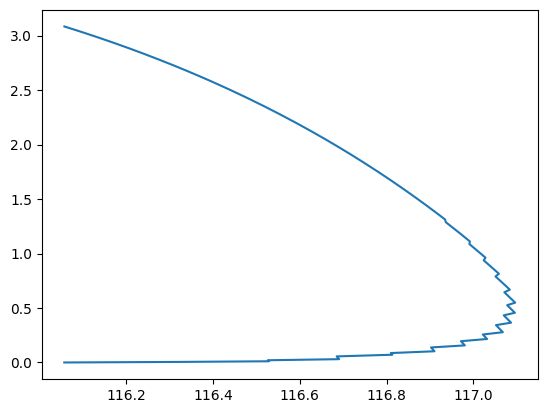

n0_star borders 0.0 4.0
Diff Rho: 0.496510615585483
n0_star borders 0.0 4.0
Diff Rho: 0.9379127554578143
n0_star borders 0.0 4.0
Diff Rho: 0.4718178439218099
n0_star borders 0.0 4.0
Diff Rho: 0.47921303958521344
n0_star borders 0.0 4.0
Diff Rho: 0.7901826733028712
n0_star borders 0.0 4.0
Diff Rho: 0.9665130223073072
n0_star borders 0.0 3.936135455088148
Diff Rho: 0.8678359506002157
n0_star borders 0.0 3.886653720045408
Diff Rho: 1.4350507589211439
n0_star borders 0.0 3.738498203643745
Diff Rho: 2.2737980685268235
n0_star borders 0.0 3.3881241216836284
Diff Rho: 2.3976421213370256
Errors: 0.00034219744504420107 1.679296762355609e-07 1
n0_star borders 0.0 3.278868740169886
Diff Rho: 2.118897212357318
n0_star borders 0.0 3.2902154848744325
Diff Rho: 1.831572041525568
n0_star borders 0.0 3.9168037388831882
Diff Rho: 0.4117524086304806
n0_star borders 0.0 4.0
Diff Rho: 0.44169995381717553
n0_star borders 0.0 4.0
Diff Rho: 0.42553201597420626
n0_star borders 0.0 4.0
Diff Rho: 0.6499737385192

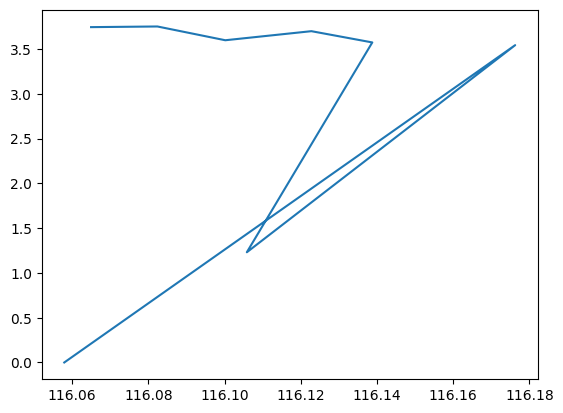

n0_star borders 0.0 4.0
Diff Rho: 0.24358949618585188
n0_star borders 0.0 4.0
Diff Rho: 0.2363336056545518
n0_star borders 0.0 4.0
Diff Rho: 0.23143377701650672
n0_star borders 0.0 4.0
Diff Rho: 0.2692016584913117
n0_star borders 0.0 4.0
Diff Rho: 0.2809950914994998
n0_star borders 0.0 4.0
Diff Rho: 0.27581207488137116
n0_star borders 0.0 4.0
Diff Rho: 0.273746629081759
n0_star borders 0.0 4.0
Diff Rho: 0.2739722203170772
n0_star borders 0.0 4.0
Diff Rho: 0.27043483949051955
n0_star borders 0.0 4.0
Diff Rho: 0.2763310731475717
Errors: 0.24225238537016508 4.219737040308724e-07 1
n0_star borders 0.0 4.0
Diff Rho: 0.48008273718957806
n0_star borders 0.0 4.0
Diff Rho: 1.2590861174139734
n0_star borders 0.0 4.0
Diff Rho: 0.5118695522812575
n0_star borders 0.0 2.6846680671121668
Diff Rho: 0.5975812601179975
n0_star borders 0.0 2.630261931270219
Diff Rho: 0.8215290112016386
n0_star borders 0.0 2.6004517415434716
Diff Rho: 0.9252874881679474
n0_star borders 0.0 2.5737800166502742
Diff Rho: 0.8

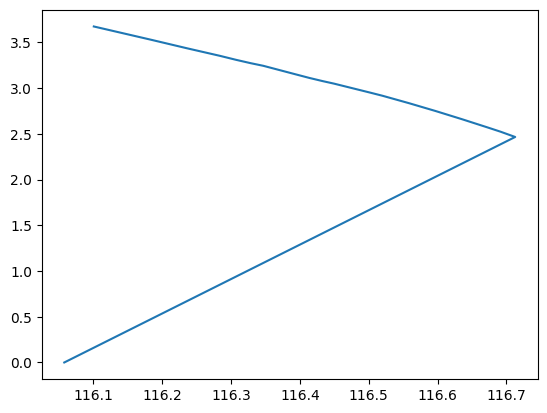

n0_star borders 0.0 3.7498169570935946
Diff Rho: 0.0762147349865157
n0_star borders 0.0 3.75842098120638
Diff Rho: 0.07861433982536742
n0_star borders 0.0 3.7418410577012637
Diff Rho: 0.08022702601410886
n0_star borders 0.0 3.7315732890497313
Diff Rho: 0.08079064058639907
n0_star borders 0.0 3.7190663183847326
Diff Rho: 0.08478946152568478
n0_star borders 0.0 3.8071215194810137
Diff Rho: 0.08882268670347113
n0_star borders 0.0 3.7422828657829754
Diff Rho: 0.09143005480973204
n0_star borders 0.0 3.71014781330245
Diff Rho: 0.09441881194087319
n0_star borders 0.0 4.0
Diff Rho: 0.09862489038711525
n0_star borders 0.0 3.6869119228484033
Diff Rho: 0.10295863616180571
Errors: 0.00025376327280018723 3.633016105172537e-07 1
n0_star borders 0.0 3.687463373746647
Diff Rho: 0.10369723946403771
n0_star borders 0.0 4.0
Diff Rho: 0.11603630491450409
n0_star borders 0.0 4.0
Diff Rho: 0.1880214611301439
n0_star borders 0.0 4.0
Diff Rho: 3.243479005332496
n0_star borders 0.0 3.8696470300806847
Diff Rho:

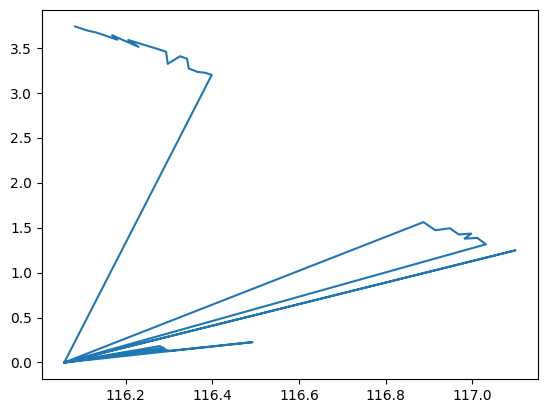

n0_star borders 0.0 4.0
Diff Rho: 1.0702860482046603
n0_star borders 0.0 2.3967677919276165
Diff Rho: 2.8678299874482804
n0_star borders 0.0 4.0
Diff Rho: 2.1223907388007723
n0_star borders 0.0 4.0
Diff Rho: 1.4764031017013883
n0_star borders 0.0 4.0
Diff Rho: 1.1725143930494197
n0_star borders 0.0 2.11879575331905
Diff Rho: 18.950685348723166
n0_star borders 0.0 4.0
Diff Rho: 2.035649692869414
n0_star borders 0.0 4.0
Diff Rho: 2.3695646928319123
n0_star borders 0.0 4.0
Diff Rho: 2.435799241238138
n0_star borders 0.0 4.0
Diff Rho: 3.964140483461158
Errors: 0.012748990249924897 1.2408763756573147e-06 1
n0_star borders 0.0 4.0
Diff Rho: 0.7254604449822475
n0_star borders 0.0 4.0
Diff Rho: 0.612422391570334
n0_star borders 0.0 4.0
Diff Rho: 0.3811989994630029
n0_star borders 0.0 4.0
Diff Rho: 0.38988934566910494
n0_star borders 0.0 2.842760424962438
Diff Rho: 0.5349786354493948
n0_star borders 0.0 2.6282271271545667
Diff Rho: 0.5860658773975627
n0_star borders 0.0 2.9171180898001667
Diff 

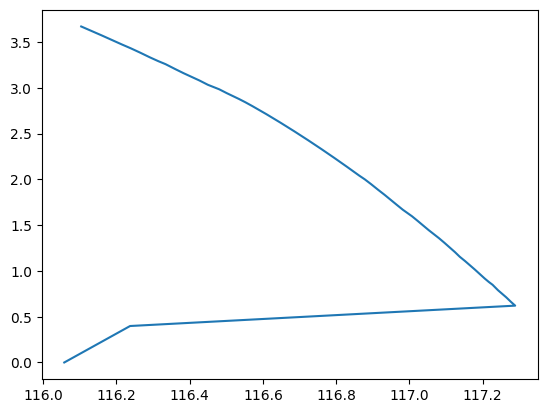

n0_star borders 0.0 2.9184242323494023
Diff Rho: 0.05592759638047883
n0_star borders 0.0 1.9776233028106498
Diff Rho: 0.05534391610394035
n0_star borders 0.0 1.9776576150862408
Diff Rho: 0.054900942753908485
n0_star borders 0.0 1.9776437332557584
Diff Rho: 0.05511452826183848
n0_star borders 0.0 1.9776283237962722
Diff Rho: 0.055171277077130036
n0_star borders 0.0 3.6620749416960785
Diff Rho: 0.05506520895942604
n0_star borders 0.0 2.7752205699417294
Diff Rho: 0.05518741161029466
n0_star borders 0.0 1.9776323984937005
Diff Rho: 0.055007226702463274
n0_star borders 0.0 1.9776799488991488
Diff Rho: 0.055866494283179746
n0_star borders 0.0 1.977768440934256
Diff Rho: 0.06136576953742314
Errors: 3.9542419250459024e-05 2.121307389847056e-07 1
n0_star borders 0.0 1.9780796810384278
Diff Rho: 0.06772220129866413
n0_star borders 0.0 1.9768010907725855
Diff Rho: 0.06882871250390818
n0_star borders 0.0 1.9765586136524345
Diff Rho: 0.06800204872615478
n0_star borders 0.0 1.9766381429163742
Diff R

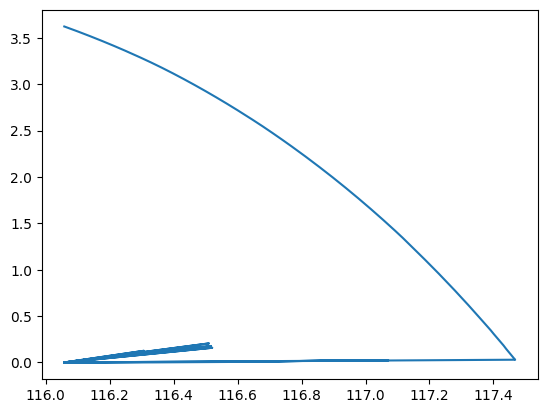

n0_star borders 0.0 2.246259127813333
Diff Rho: 1.2843988941876694
n0_star borders 0.0 1.9674961121275083
Diff Rho: 2.2460812554346
n0_star borders 0.0 1.9678515249454853
Diff Rho: 0.9734818849501663
n0_star borders 0.0 1.9682627233243366
Diff Rho: 0.8086630276522918
n0_star borders 0.0 2.776397761892628
Diff Rho: 0.936000725320738
n0_star borders 0.0 1.9728242330589918
Diff Rho: 0.7717542757102283
n0_star borders 0.0 1.9739814288364919
Diff Rho: 0.7807129766390221
n0_star borders 0.0 3.1246624476089586
Diff Rho: 1.6357479417705514
n0_star borders 0.0 2.9622758304916
Diff Rho: 1.4587956340805714
n0_star borders 0.0 2.9314567254087227
Diff Rho: 1.6229577682660692
Errors: 0.00016934994655677364 1.282598469453831e-07 1
n0_star borders 0.0 2.8183023232001756
Diff Rho: 4.742364898548206
n0_star borders 0.0 2.7752344862130354
Diff Rho: 3.134275168329189
n0_star borders 0.0 1.979280661781964
Diff Rho: 1.594607435513582
n0_star borders 0.0 1.969567143038115
Diff Rho: 1.0531317677324812
n0_star

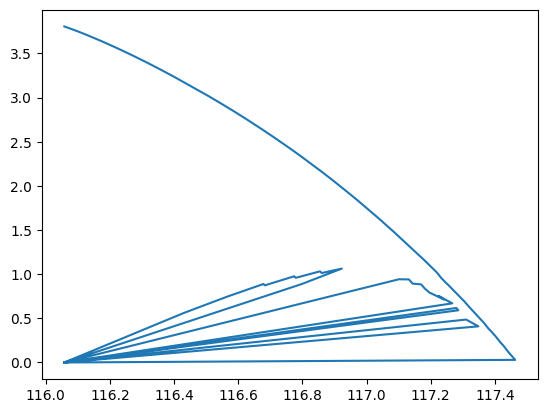

n0_star borders 0.0 1.9816067971863687
Diff Rho: 0.12299661679371314
n0_star borders 0.0 1.9821492413329949
Diff Rho: 0.12091209484359766
n0_star borders 0.0 1.9749611378848901
Diff Rho: 0.11442698914140847
n0_star borders 0.0 3.760206536227457
Diff Rho: 0.11154693884540413
n0_star borders 0.0 1.9768305349877653
Diff Rho: 0.11025236330514936
n0_star borders 0.0 1.97647679197499
Diff Rho: 0.11144734442493134
n0_star borders 0.0 1.977066180147201
Diff Rho: 0.1169930363218511
n0_star borders 0.0 1.9759063673088821
Diff Rho: 0.3517198222269324
n0_star borders 0.0 1.9760075680508244
Diff Rho: 0.14057725364755463
n0_star borders 0.0 1.9833500795333583
Diff Rho: 0.15880738665688793
Errors: 2.2088022072250012e-05 1.671151844473677e-07 1
n0_star borders 0.0 1.9834275984066967
Diff Rho: 0.295960403504034
n0_star borders 0.0 1.9765155520750215
Diff Rho: 0.24970563503931242
n0_star borders 0.0 1.976787948911686
Diff Rho: 0.10705435407880351
n0_star borders 0.0 4.0
Diff Rho: 0.13317314286567175
n0_

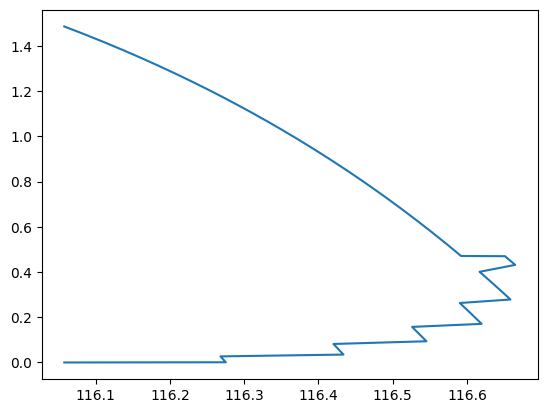

n0_star borders 0.0 4.0
Diff Rho: 2.908652238570035
n0_star borders 0.0 1.890887657522935
Diff Rho: 1.4726891826011446
n0_star borders 0.0 4.0
Diff Rho: 1.0736633469346957
n0_star borders 0.0 4.0
Diff Rho: 1.0267435768899504
n0_star borders 0.0 4.0
Diff Rho: 1.4060123250404113
n0_star borders 0.0 4.0
Diff Rho: 0.6584187801794931
n0_star borders 0.0 4.0
Diff Rho: 0.5793308635127018
n0_star borders 0.0 2.5283826945171475
Diff Rho: 0.5076662357585002
n0_star borders 0.0 2.3294394739576054
Diff Rho: 0.4847832682644783
n0_star borders 0.0 2.197815726620192
Diff Rho: 0.47300869727629447
Errors: 0.00045045189401545757 9.265044947084702e-08 1
n0_star borders 0.0 2.1103406779169736
Diff Rho: 0.47042067291437634
n0_star borders 0.0 2.0519268961680477
Diff Rho: 0.4861914542024413
n0_star borders 0.0 2.5337078879850425
Diff Rho: 0.5183305348081754
n0_star borders 0.0 1.9944748054579575
Diff Rho: 0.6112256083033867
n0_star borders 0.0 1.9871381219813764
Diff Rho: 2.6628095075490066
n0_star borders 

KeyboardInterrupt: 

In [4]:
#Non approximated version first

from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
stats.print_stats()

#objects['mwc_Rho_J'] = mwc_Rho_J
#objects['mwc_Rho_W'] = mwc_Rho_W
#objects['mwc_Rho_U'] = mwc_Rho_U
#objects['mwc_Rho_Rho'] = mwc_Rho_Rho
#with open('my_objects.pkl', 'wb') as file:
#    pickle.dump(objects, file)

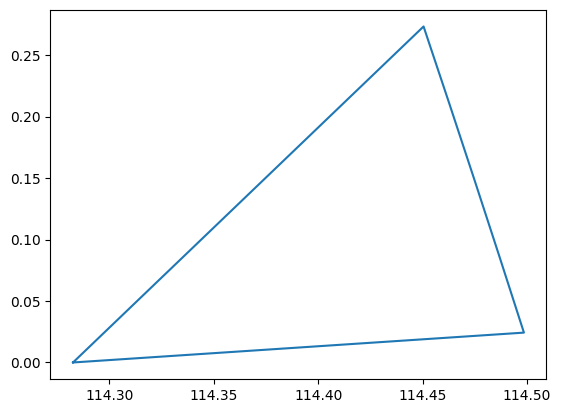

In [11]:
prod = p.z_0-2
j=0
s=3
minv= 0
q = 0
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],mwc_Rho_J[prod,j,s,:,q])
#plt.plot(mwc_Rho_W[prod,j,s,:,q,1],mwc_Rho.J1p.eval_at_W1(mwc_Rho_W[...,1])[prod,j,s,:,q])
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_Rho[prod,j,s,:,0]) #Why is Rho convex??? Why J is concave? Also it's not smooth at highest productivity, effect of hiring i'd wager
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho.w_grid,mwc_Rho_W[p.z_0-1,j,s,:,0,1])
#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[p.z_0-1,j,s,:,0])

In [ ]:
from Multiworker_Contract_hire_Rho import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']
mwc_Rho_U = objects['mwc_Rho_U']
mwc_Rho_Rho = objects['mwc_Rho_Rho']

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1,mwc_Rho_J1p)=mwc_Rho.J_sep(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,0)

#(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_pc,mwc_Rho_n0,mwc_Rho_n1,mwc_Rho_J1p)=mwc_Rho.J(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,0)
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
stats.print_stats()

objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

# GE basic
mwc_GE_J = objects['mwc_Rho_J']
mwc_GE_W = objects['mwc_Rho_W']
mwc_GE_U = objects['mwc_Rho_U']
mwc_GE_Rho = objects['mwc_Rho_Rho']

#mwc_GE_J = objects['mwc_GE_J']
#mwc_GE_W = objects['mwc_GE_W']
#mwc_GE_U = objects['mwc_GE_U']
#mwc_GE_Rho = objects['mwc_GE_Rho']

#(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(None,None,None,1)
#(mwc_GE_J,mwc_GE_W,mwc_GE_U, mwc_GE_Rho, mwc_GE_Wstar,mwc_GE_pc,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(mwc_GE_J,mwc_GE_W,mwc_GE_U,mwc_GE_Rho,1)
(mwc_GE_J,mwc_GE_W,mwc_GE_U, mwc_GE_Rho, mwc_GE_Wstar,mwc_GE_pc,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J_sep(mwc_GE_J,mwc_GE_W,mwc_GE_U,mwc_GE_Rho,1)

#objects['mwc_GE_J'] = mwc_GE_J
#objects['mwc_GE_W'] = mwc_GE_W
#objects['mwc_GE_U'] = mwc_GE_U
#objects['mwc_GE_Rho'] = mwc_GE_Rho
 
#with open('my_objects.pkl', 'wb') as file:
#    pickle.dump(objects, file)

In [8]:
mwc_Rho_J1p.update_cst_ls(mwc_Rho_W[...,1], mwc_Rho_J)

(0.0, 0.9999999754081301)

In [6]:
mwc_Rho_J1p.gamma_all[p.z_0-1,3,3,:,0]

array([ 91.02701472,  -3.49655848, -97.9716307 ,   4.58915257,
       117.65965717])

In [ ]:
# GE separations
if results is None:
    mwc_GE_s_J = objects['mwc_GE_J']
    mwc_GE_s_W = objects['mwc_GE_W']
else:
    mwc_GE_s_J = results['Ji']
    mwc_GE_s_W = results['W1i']

(mwc_GE_s_J,mwc_GE_s_W,mwc_GE_s_Wstar,mwc_GE_s_sep,mwc_GE_s_n0,mwc_GE_s_n1)=mwc_GE.J_sep_dir(mwc_GE_J,mwc_GE_W,1)

objects['mwc_GE_s_J'] = mwc_GE_s_J
objects['mwc_GE_s_W'] = mwc_GE_s_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

## Trying out the generalized approximation again
### Approach: see how much updating can help
Note from the standard approximations: it can work very well, or it can work horribly. Seems a bit too inconsistent, which is why it would be better to fit just a single function

In [4]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [5]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']
mwc_Rho_U = objects['mwc_Rho_U']
mwc_Rho_Rho = objects['mwc_Rho_Rho']


In [6]:
import valuefunction_general
J1p = valuefunction_general.PowerFunctionGrid(mwc_Rho_W,mwc_Rho_J,mwc_Rho.N_grid,mwc_Rho.N_grid1)

In [7]:
#Try comparing the derivatives wrt n0 and n1? Do they makes sense Are they similar to the actual ones? That is crucial
def deriv_n0(n0,n1,gamma):
    sum_size= n0+n1
    return gamma[6] * gamma[4] * np.power(sum_size,gamma[4]-1) + gamma[5]


def deriv_n1(n0,n1,gamma,W):
    sum_size= n0+n1
    Xi_arg = (gamma[7] + np.exp(gamma[3]) - W)/ 100.0
    Xi_pow = np.power( Xi_arg , gamma[2])
    return gamma[6] * gamma[4] * np.power(sum_size,gamma[4]-1) + gamma[1] * Xi_pow

In [12]:
np.shape( + deriv_n0(mwc_Rho.N_grid[j,np.newaxis],mwc_Rho.N_grid1[s,np.newaxis],J1p.gamma_all[prod,:,q,np.newaxis]))

(200,)

#### Seeing how well my parametrization works with derivatives. Answer: not very well, esp with n0. Porbably means I need better interactions

In [ ]:
#Plotting the derivatives against each other
prod = p.z_0-0
j=2
s=2
minv= 0
q = 0

plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

# First subplot: wrt n0
plt.subplot(1, 2, 1) 

plt.plot(mwc_Rho_W[prod,j,s,:,q,1],(mwc_Rho_J[prod,j+1,s,:,q]-mwc_Rho_J[prod,j-1,s,:,q]) / 2 + mwc_Rho.rho_grid[:]*mwc_Rho.N_grid1[s] * (mwc_Rho_W[prod,j+1,s,:,q,1]-mwc_Rho_W[prod,j-1,s,:,q,1]))
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],mwc_Rho_W[prod,j,s,:,q,1]/1e100 + deriv_n0(mwc_Rho.N_grid[j,np.newaxis],mwc_Rho.N_grid1[s,np.newaxis],J1p.gamma_all[prod,:,q,np.newaxis]))


# Second subplot: wrt n1
plt.subplot(1, 2, 2) 

plt.plot(mwc_Rho_W[prod,j,s,:,q,1],(mwc_Rho_Rho[prod,j,s+1,:,q]-mwc_Rho_Rho[prod,j,s-1,:,q]) / 2 - mwc_Rho.rho_grid[:]*mwc_Rho_W[prod,j,s,:,q,1])
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],(mwc_Rho_J[prod,j,s+1,:,q]-mwc_Rho_J[prod,j,s-1,:,q]) / 2 + mwc_Rho.rho_grid[:]*mwc_Rho.N_grid1[s] * (mwc_Rho_W[prod,j,s+1,:,q,1]-mwc_Rho_W[prod,j,s-1,:,q,1]))
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],deriv_n1(mwc_Rho.N_grid[j],mwc_Rho.N_grid1[s],J1p.gamma_all[prod,:,q],mwc_Rho_W[prod,j,s,:,q,1]))

In [8]:
J1p.rsqr

array([[7.85175651e-04],
       [5.12840089e-04],
       [9.03734064e-05]])

In [27]:
J1p.update(mwc_Rho_W[...,1], mwc_Rho_J, 0.1)

51.97463393127154

In [15]:
J1p.update_cst_ls(mwc_Rho_W[...,1], mwc_Rho_J)

(2.2842487309905165e-12, 0.9999999532497685)

In [17]:
J1p.update_local_min(mwc_Rho_W, mwc_Rho_J)

In [22]:

J1p.gamma_all[p.z_0-0, 1, 0] = 1 - J1p.gamma_all[p.z_0-0, 1, 0]

Below are the usual solutions, without approx or with BL approx

In [ ]:
from valuefunction_multi import PowerFunctionGrid
J1p=PowerFunctionGrid(mwc_Rho_W, mwc_Rho_J)

In [ ]:
J1p.update_cst_ls(mwc_Rho_W[...,1], mwc_Rho_J)

In [ ]:
prod = p.z_0-2
j=2
s=1
q=5
#plt.plot(mwc_Rho.w_grid,mwc_Rho_W[prod,j,s,:,q,1])
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],mwc_Rho_J[prod,j,s,:,q])
plt.plot(mwc_Rho_W[prod,j,s,:,q,1],J1p.eval_at_W1(mwc_Rho_W[...,1])[prod,j,s,:,q])
#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[prod,j,s,:,q])
#plt.plot(mwc_Rho.w_grid,mwc_Rho.J1p.eval_at_W1(mwc_Rho_W[...,1])[prod,j,s,:,q])

#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_sep[prod,j,s,:,0])
#plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_n0[prod,j,s,:,0])
#plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_J[prod,j,s,:,0])


#plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_n0[prod,j,s,:,0])


#Something is very wrong here, for some reason, when the seniors are the "cheapest" (lowest w_grid), the firm doesn't hire???
#Also the top part is still...kinda weird
#Also no hiring at 1 junior, but hiring at 1 senior???

So... why is it even the case that two different definitions of Rho give different results? 
Why is ERho_star - rho_star*n1_star*EW_star different from EJ_star? Especially after the approximation?

In [ ]:
if results is None:
    mwc_Rho_s_J = objects['mwc_Rho_s_J']
    mwc_Rho_s_W = objects['mwc_Rho_s_W']
    mwc_Rho_s_W = objects['mwc_Rho_s_U']    
else:
    mwc_Rho_s_J = results['J']
    mwc_Rho_s_W = results['W']
    

(mwc_Rho_s_J,mwc_Rho_s_W,mwc_Rho_s_U,mwc_Rho_s_Rho,mwc_Rho_s_Wstar,mwc_Rho_s_sep,mwc_Rho_s_n0,mwc_Rho_s_n1)=mwc_Rho.J_sep_dir(mwc_Rho_J,mwc_Rho_W)

objects['mwc_Rho_s_J'] = mwc_Rho_s_J
objects['mwc_Rho_s_W'] = mwc_Rho_s_W
objects['mwc_Rho_s_U'] = mwc_Rho_s_U

with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()

# Plots

In [15]:
output_dir = 'Plots'
if not os.path.exists(output_dir):
         os.makedirs(output_dir)

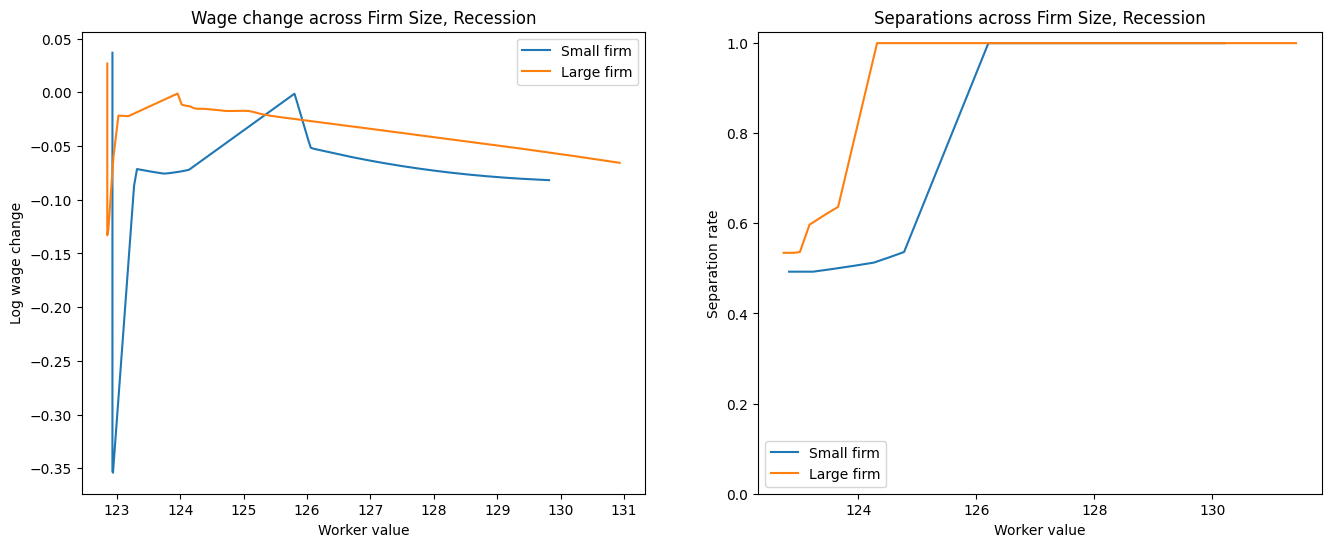

In [16]:
        #THIS IS SOMEHOW THE OPPOSITE??? In firms with many juniors wage drops are larger?? Why?? I guess they don't care for that many seniors?
        #But then why would it equialize afterwards... AHHH BECAUSE ALL THE JUNIORS ARE ALREADY FIRED
        #Now 1,3 places much higher weight on its expensive seniors hencewhy wage drop not that large...? WAGE DROP BOUNCES UP A BIT WHEN THEY START FIRING
        #Still can't understand why 1,1 goes for full firing earlier tho... Also at the same time that complete firing happens, wage drops amplify... guess that makes sense tho
        save=1
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1) 
        # Plot the data
        #plt.plot(mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 1 ,:, 5]-mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5],mwc_Rho_s_W[0,1,1,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5],mwc_Rho_s_W[0,1,3,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Large firm')

        #plt.plot(mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 3 ,:, 5]-mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], label='Larger firm')
        #plt.plot(baseline_W[0, 3, 1 ,:, 5, 1], baseline_Wstar[0, 3, 1 ,:, 5]-baseline_W[0, 3, 1 ,:, 5, 1], label='Larger firm wage')
        #if mwc_s_W is not None:
        #    plt.plot(mwc_s_W[p.z_0-1, 0, 1,:, 1], mwc_s_Wstar[p.z_0-1, 0, 1, :]-mwc_s_W[p.z_0-1, 0, 1,:, 1], label='DRS with separations')
        #if mwc_s_dir_W is not None:
        #    plt.plot(mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], mwc_s_dir_Wstar[p.z_0-1, 0, 1, :]-mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], label='DRS with direct separations')
        plt.legend()
        # Add titles and labels
        plt.title('Wage change across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Log wage change')

        # Secone subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

        plt.plot(mwc_Rho_s_W[0, 1, 1, :, 0 ,1], mwc_Rho_s_sep[0, 1, 1, :, 0], label='Small firm')
        plt.plot(mwc_Rho_s_W[0, 1, 3, :, 0 ,1], mwc_Rho_s_sep[0, 1, 3, :, 0], label='Large firm')

        plt.legend()
        # Add titles and labels
        plt.title('Separations across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Separation rate')
        plt.ylim(ymin=0)
        if save==1:
          plt.savefig(os.path.join(output_dir,'Log wage cuts and Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

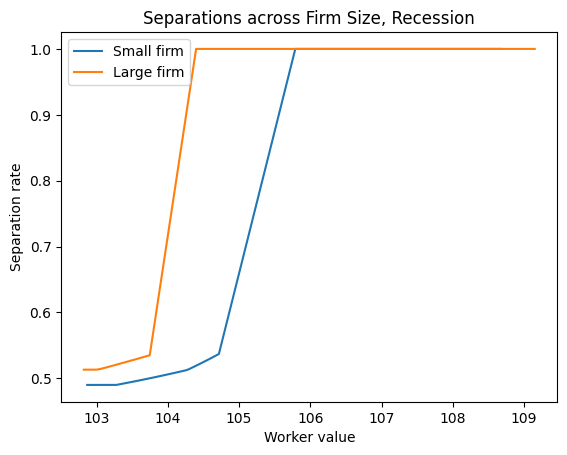

In [28]:

if save==1:
        plt.savefig(os.path.join(output_dir,'Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

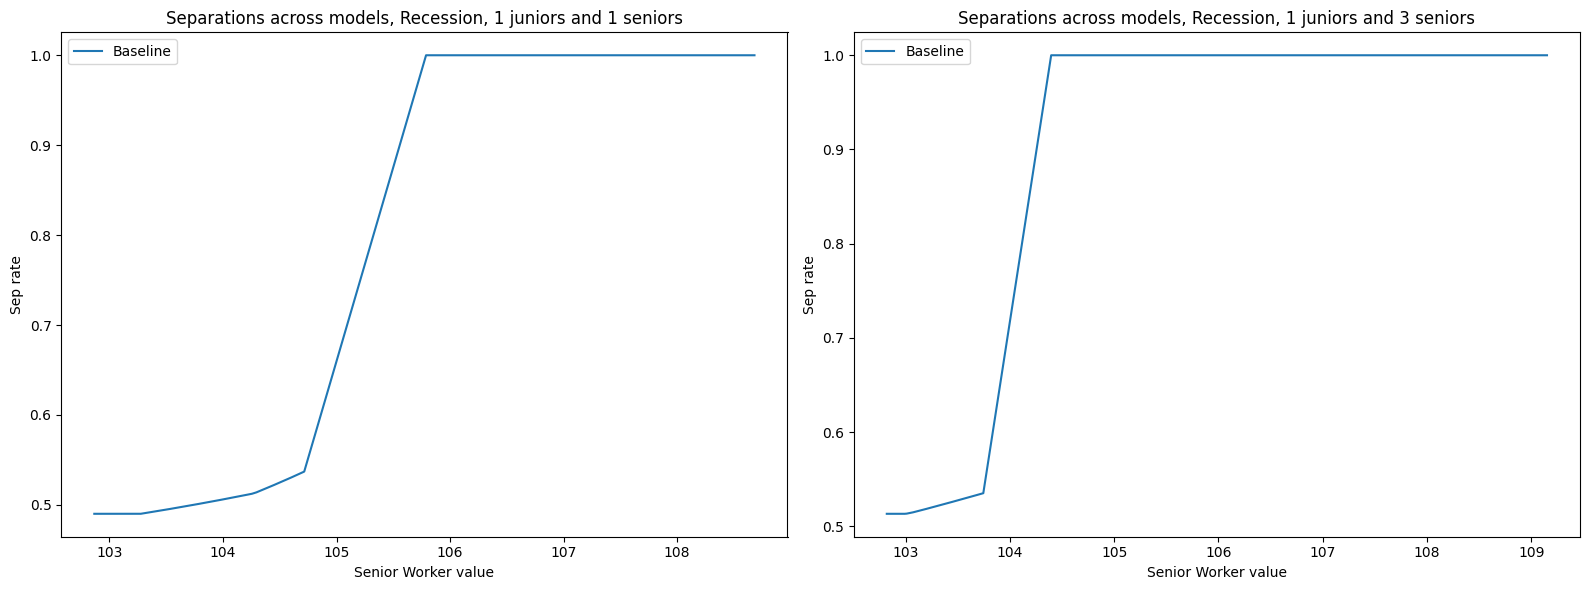

In [14]:
plot_sep(0,0,    1,1,    1,3,    0,  0,0,    0)

In [11]:
def plot_sep(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1

        #plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_sep[prod1, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod1, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod1, jun, sen, :, qual], label='Baseline')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2

        #plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod2, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [7]:
names = [ 'DRS HMQ', 'DRS HMQ via RHO', 'HMQ']

In [ ]:
plts.CRSvsDRSvalue(names,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_Rho_J[...,0],mwc_Rho_W[...,0,:],mwc_Rho_J[...,0],None,None,0)

In [9]:
def plot_GE(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
       
        plt.plot(mwc_GE_W[prod1, jun, sen, :, qual ,1], mwc_GE_J[prod1, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_J[prod1, jun, sen, :, qual], label='With separations')


     

        if prod1 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        plt.plot(mwc_GE_W[prod2, jun, sen, :, qual ,1], mwc_GE_J[prod2, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_J[prod2, jun, sen, :, qual], label='With separations')

       
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'General Equilibrium Value Function.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plot_GE(2,0,    1,2,    1,1,    0,  0,0,    0)

In [6]:
baseline_sep = objects['baseline_sep']
baseline_W = objects['baseline_W']
baseline_Wstar = objects['baseline_Wstar']


noHMQ_sep = objects['noHMQ_sep']
noHMQ_W = objects['noHMQ_W']
noHMQ_Wstar = objects['noHMQ_Wstar']
nohire_sep = objects['nohire_sep']
nohire_W = objects['nohire_W']
nohire_Wstar = objects['nohire_W']
hiresub_sep = objects['hiresub_sep']
hiresub_W = objects['hiresub_W']
hiresub_Wstar = objects['hiresub_Wstar']

In [7]:
import os
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
def plott(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
        if baseline_W is not None:        
            plt.plot(baseline_W[prod1, jun, sen, 5:50, qual ,1], baseline_sep[prod1, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod1, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod1, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod1, jun, sen, 5:50, qual ,1], nohire_sep[prod1, jun, sen, 5:50, qual], label='CRS') #Not true CRS but still
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod1, jun, sen, 5:50, qual, 1], noHMQ_sep[prod1, jun, sen, 5:50, qual], label='No match heterog')
        #if minwage_W is not None: 
        # if minwage ==1: 
        #  plt.plot(minwage_W[prod1, jun, sen, 5:50, qual, 1], minwage_sep[prod1, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod1, jun, sen, 5:50, qual, 1], hiresub_sep[prod1, jun, sen, 5:50, qual], label='Hiring subsidy')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, jun, sen, 5:50, qual, 1], baseline_sep[prod2, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod2, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod2, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod2, jun, sen, 5:50, qual, 1], nohire_sep[prod2, jun, sen, 5:50, qual], label='CRS')  
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod2, jun, sen, 5:50, qual, 1], noHMQ_sep[prod2, jun, sen, 5:50, qual], label='No match heterog')     
        #if minwage_W is not None:
        # if minwage == 1:  
        #  plt.plot(minwage_W[prod2, jun, sen, 5:50, qual, 1], minwage_sep[prod2, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod2, jun, sen, 5:50, qual, 1], hiresub_sep[prod2, jun, sen, 5:50, qual], label='Hiring subsidy')            
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plott(0,0,  1,3,    2,2,    5,0,0,save=0)

In [ ]:
plott(0,0,  1,1,    1,3,    5, 0,0, save=0)

In [ ]:
        prod2=0
        save=1
        qual = 5
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 1, 5:, qual, 1], baseline_sep[prod2, 1, 1, 5:, qual], label='Small firm')
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Larger firm')  
        #if baseline_W is not None:        
        
        #plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Many seniors')     
         
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across size, Boom')
        elif prod2 == 0:
          plt.title(f'Separations across size, Recession')
        else:
          plt.title(f'Separations across size, {prod} productivity')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations across size new.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
#This is no DRS/hiring. Even less firing than no HMQ

plts.sep(0,p.z_0,1,3,1,3,None,None,noHMQ_W[...,1,:],noHMQ_sep[...,1])

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,baseline_W[...,0,:],baseline_Wstar[...,0],nohire_W[...,0,:],baseline_Wstar[...,0],None,None,0)

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
            #something like: sep_star = interp(0,foc_sep,sep_grid) + extra conditions
            #need derivatives of future expectations!
            # for that, I interpolate onto rho_star,n0_star, and one of n1_s/q_s. If I'm looking for derivative wrt size, I interpolate onto q_s and THEN take the difference between two discrete values
            #n1_s[iz,in0,in1,iv,iq,s] = (N_grid[in0]*(1-sep_grid[s])+N_grid1[in1]) * pc_temp[iz,in0,in1,iv] #Gives me sep for every damn value hell yeah
            #n1_s_ceil = np.ceil(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #n1_s_floor = np.floor(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #J_n1[iz,...,s,in11] = RegularGridInterpolator((N_grid, rho_grid, Q_grid), EJpi[iz, :, in11, ...], bounds_error=False, fill_value=None) ((n0_star[iz, ...], rho_star[iz, ...], q_s[iz, ...,s]))
            #J_fut_deriv_n[...,s] = (J_n1[...,s,n1_s_ceil[...,s]] - J_n1[...,s,n1_s_floor[...,s]] ) / (N_grid1[n1_s_ceil[...,s]] - N_grid1[n1_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (n1_s_ceil==0), last_bound = (N_grid1[n1_s_floor]==n_bar)
            #J_fut_deriv_n[first_bound] = (J_n1[first_bound,1] - J_n1[first_bound,0] ) / (N_grid1[1] - N_grid1[0])
            #J_fut_deriv_n[last_bound] = (J_n1[last_bound,-1] - J_n1[last_bound,-2] ) / (N_grid1[-1] - N_grid1[-2])
 
            #q_s = (N_grid[self.grid[1]] * (self.p.q_0 - np.max(sep_grid[s]-( 1- self.p.q_0),0))+Q_grid[self.grid[4]]*N_grid1[self.grid[2]]) / (N_grid[self.grid[1]]*(1-sep_grid[s])+N_grid1[self.grid[2]])
            #J_q[iz,...,s,iqq] = RegularGridInterpolator((N_grid, N_grid1, rho_grid), EJpi[iz, ..., iqq], bounds_error=False, fill_value=None) ((n0_star[iz, ...], n1_s[iz,...,s], rho_star[iz, ...]))
            #J_fut_deriv_q[...,s] = (J_q[...,s,q_s_ceil[...,s]] - J_n1  [...,s,q_s_floor[...,s]] ) / (Q_grid[q_s_ceil[...,s]] - Q_grid[q_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (q_s_ceil==0), last_bound = (Q_grid[q_s_floor]=1.0)
            #J_fut_deriv_q[first_bound] = (J_q[first_bound,1] - J_q[first_bound,0] ) / (Q_grid1[1] - Q_grid1[0])
            #J_fut_deriv_q[last_bound] = (J_q[last_bound,-1] - J_q[last_bound,-2] ) / (Q_grid1[-1] - Q_grid1[-2])
            #q_deriv_s = N_grid[grid[1]] * q_s / (N_grid1[grid[2]]+(1-sep_grid[s])*N_grid[grid[1]]) #Probably need to loop over s. Not efficient, but simpler than redoing the whole self.grid thing
            #worker_fut_value = interp ( rho_star,rho_grid,re+EW1i)                    #This is because we don't yet have the worker future value yet. OR just use EW1_star and re_star??? a little risky but possible.
            #Could be a good start
            #foc_sep[...,s] = - J_fut_deriv[...,s] * pc_temp + J_fut_deriv_q * q_deriv_s - (re+EW1i - EUi) / self.pref.inv_utility_1d(self.v_0-self.p.beta*(s_grid[s] * EUi + (1-s_grid[s]) * (EW1_star + re_star)
            # sep_neg = np.all (foc <= 0, axis = -1)
            # sep_max = np.all (foc > 0, axis = -1)
            # sep_star[sep_neg] = 0
            # sep_star[sep_max] = 1.0 #OH SHIT WHAT IF THE Q IS ALREADY AT ITS MAX? I think this should account for it, no?
            #sep_star = interp_multidim(0,-impose_decreasing(foc_sep),sep_grid) 